In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [4]:
np.random.seed(42)

X = np.random.rand(1000, 10)  

y_reg = X @ np.random.rand(10) + np.random.randn(1000) * 0.1  

y_cls = np.random.choice(["A", "B", "C"], size=1000)  

In [6]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_train_cls = scaler.transform(X_train_cls)  
X_test_cls = scaler.transform(X_test_cls)

encoder = LabelEncoder()
y_train_cls = encoder.fit_transform(y_train_cls)
y_test_cls = encoder.transform(y_test_cls)


In [8]:
def build_regression_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train_reg.shape[1],)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1)  # Single output neuron for regression
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

In [10]:
def build_classification_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train_cls.shape[1],)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(3, activation="softmax")  # 3 output neurons for 3 classes
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [12]:
# Train regression model
reg_model = build_regression_model()
history_reg = reg_model.fit(X_train_reg, y_train_reg, epochs=100, batch_size=32, validation_data=(X_test_reg, y_test_reg), verbose=0)

# Train classification model
cls_model = build_classification_model()
history_cls = cls_model.fit(X_train_cls, y_train_cls, epochs=100, batch_size=32, validation_data=(X_test_cls, y_test_cls), verbose=0)


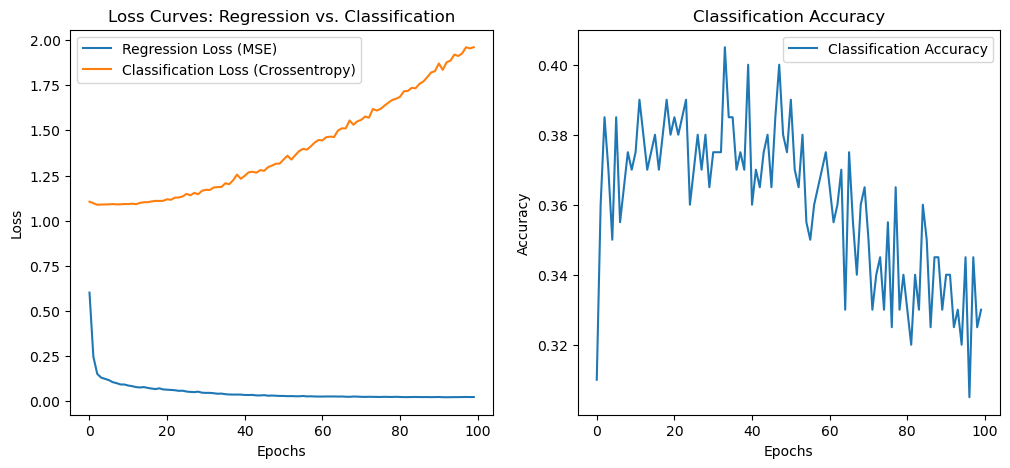

In [14]:
# Extract loss and accuracy for comparison
loss_reg = history_reg.history["val_loss"]
mae_reg = history_reg.history["val_mae"]
loss_cls = history_cls.history["val_loss"]
acc_cls = history_cls.history["val_accuracy"]

# Plot Loss Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_reg, label="Regression Loss (MSE)")
plt.plot(loss_cls, label="Classification Loss (Crossentropy)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves: Regression vs. Classification")

# Plot Accuracy for Classification Model
plt.subplot(1, 2, 2)
plt.plot(acc_cls, label="Classification Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Classification Accuracy")

plt.show()